In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import re

import sys
sys.path.insert(0, '../../')
import util.metrics as metrics

ROOT_DIRECTORY = "../../"
BASE_DIRECTORY = f"{ROOT_DIRECTORY}/results/inter-zone-single-stream-latency/packet-size/"
SECURE_DIRECTORY = f"{BASE_DIRECTORY}/secure/"
INSECURE_DIRECTORY = f"{BASE_DIRECTORY}/insecure/"


def get_packet_sizes():
    # Assumes the sizes are the same between secure, insecure 
    # directories!
    # Directory names are of the form 'size-128', and so on.
    directories = os.listdir(SECURE_DIRECTORY)
    return sorted(
        [int(re.search(r"size-([0-9]+)", directory)[1]) 
         for directory in directories]
    )


def get_secure_datas():
    return [pd.read_csv(f"{SECURE_DIRECTORY}/size-{packet_size}/stream.csv")
            for packet_size in packet_sizes]


def get_insecure_datas():
    return [pd.read_csv(f"{INSECURE_DIRECTORY}/size-{packet_size}/stream.csv")
            for packet_size in packet_sizes]


def get_metric_secure(metric):
    return np.array([metric(data) for data in secure_datas])


def get_metric_insecure(metric):
    return np.array([metric(data) for data in insecure_datas])


packet_sizes = get_packet_sizes()
secure_datas = get_secure_datas()
insecure_datas = get_insecure_datas()

secure_latencies = get_metric_secure(metrics.compute_mean_latency)
insecure_latencies = get_metric_insecure(metrics.compute_mean_latency)

secure_throughput = get_metric_secure(metrics.compute_mean_throughput)
insecure_throughput = get_metric_insecure(metrics.compute_mean_throughput)

secure_jitter = get_metric_secure(metrics.compute_mean_jitter)
insecure_jitter = get_metric_insecure(metrics.compute_mean_jitter)

print(f"PACKET SIZES:\t{packet_sizes}")

print(f"SECURE LATENCIES:\t{secure_latencies}")
print(f"INSECURE LATENCIES:\t{insecure_latencies}")

print(f"SECURE THROUGHPUTS:\t{secure_throughput}")
print(f"INSECURE THROUGHPUTS:\t{insecure_throughput}")

print(f"SECURE JITTERS:\t{secure_jitter}")
print(f"INSECURE JITTERS:\t{insecure_jitter}")




PACKET SIZES:	[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
SECURE LATENCIES:	[3.84728546e-05 5.23252384e-05 6.59533851e-05 7.96809982e-05
 9.30956439e-05 1.06748898e-04 1.20441772e-04 1.34134797e-04
 1.47827346e-04 1.61520496e-04 1.75213254e-04 1.88905795e-04
 2.02599588e-04 2.16292363e-04 2.29985371e-04 2.43677594e-04
 2.57370728e-04 2.71062693e-04 2.84756937e-04 2.98448993e-04
 3.12143773e-04 3.25836531e-04 3.39529656e-04 3.53221996e-04
 3.66917423e-04 3.80610005e-04 3.94298039e-04 4.07992725e-04
 4.21687791e-04]
INSECURE LATENCIES:	[1.87996934e-05 2.94630874e-05 3.97131225e-05 4.96094964e-05
 5.89121295e-05 6.77827918e-05 7.69245513e-05 8.61856230e-05
 9.52987055e-05 1.04274374e-04 1.13103264e-04 1.21787556e-04
 1.30707827e-04 1.40138096e-04 1.49569954e-04 1.58996478e-04
 1.68429187e-04 1.77853955e-04 1.87294209e-04 1.96719597e-04
 2.06163493e-04 2.15593648e-04 2.25026302e-0

<Figure size 2560x1920 with 0 Axes>

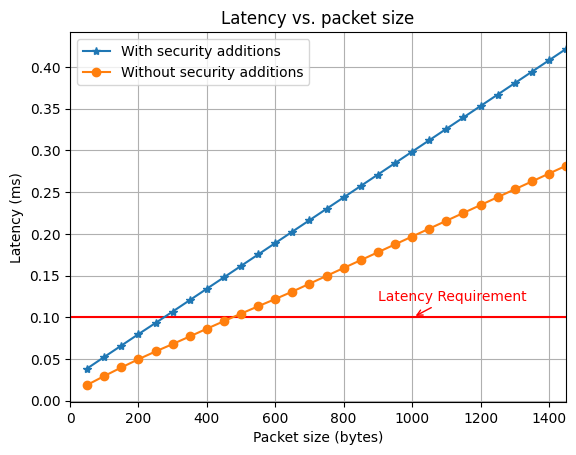

In [2]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.axhline(0.1, color='red')
ax.plot(packet_sizes, secure_latencies * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_latencies * 1000, 'o-', label="Without security additions")
ax.annotate("Latency Requirement", xy=(1003, 0.10), xytext=(900, 0.12),
             color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency vs. packet size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/latency.png")

<Figure size 2560x1920 with 0 Axes>

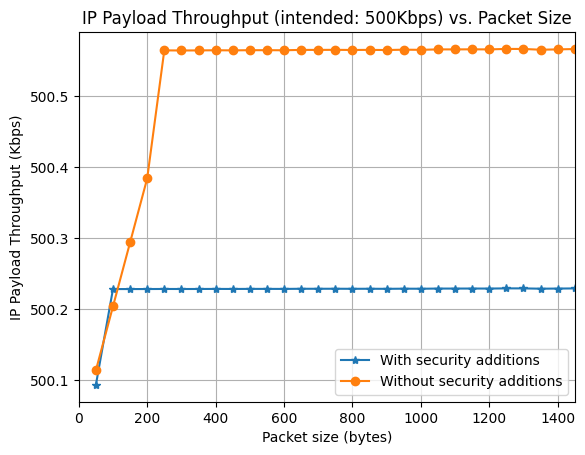

In [3]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_throughput / 1000 * 8, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_throughput / 1000 * 8, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("IP Payload Throughput (Kbps)")
ax.set_title("IP Payload Throughput (intended: 500Kbps) vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/throughput.png")

<Figure size 2560x1920 with 0 Axes>

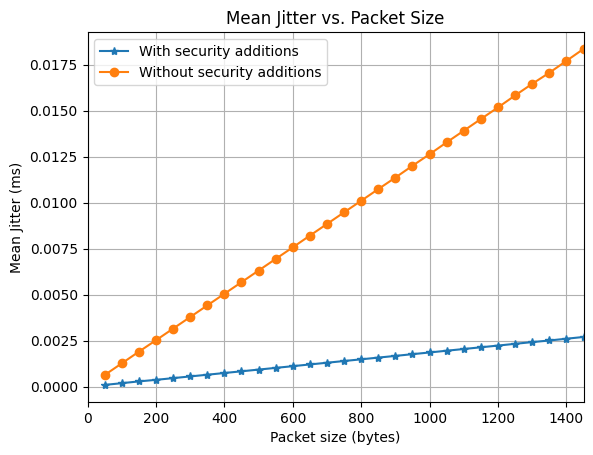

In [4]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_jitter * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_jitter * 1000, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Mean Jitter (ms)")
ax.set_title("Mean Jitter vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/jitter.png")

<Figure size 2560x1920 with 0 Axes>

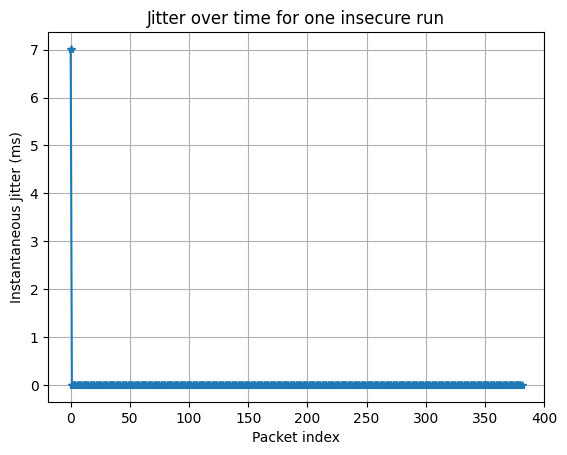

In [5]:

plt.figure(dpi=400)
fig, ax = plt.subplots()

jitter = metrics.compute_jitter(insecure_datas[-1])

ax.plot(jitter * 1000, '*-')
ax.set_xlabel("Packet index")
ax.set_ylabel("Instantaneous Jitter (ms)")
ax.set_title("Jitter over time for one insecure run")
ax.grid()
plt.show()